# 디지털신호처리 과제3

# 컴퓨터과학과/ 201810954/ 안지민

In [11]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, fixed
from IPython.display import display

### Exercise 1.2

Go to http://freesound.org and download a sound sample that
includes music, speech, or other sounds that have a well-defined pitch.
Select a roughly half-second segment where the pitch is
constant.  Compute and plot the spectrum of the segment you selected.
What connection can you make between the timbre of the sound and the
harmonic structure you see in the spectrum?

Use `high_pass`, `low_pass`, and `band_stop` to
filter out some of the harmonics.  Then convert the spectrum back
to a wave and listen to it.  How does the sound relate to the
changes you made in the spectrum?

### 컴퓨터과학과 201810954 안지민 답변

아래의 재즈 음원을 골랐습니다

https://freesound.org/people/Piotr123/sounds/511749/


In [24]:
wave = thinkdsp.read_wave('511749__piotr123__jazz_piano_intro.wav')
wave.normalize()
wave.make_audio()

해당 음원의 wave는 아래와 같습니다

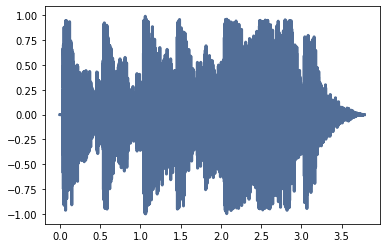

In [42]:
wave.plot()

여러부분을 잘라 확인해 보면서 최대한 constant한 pitch부분을 찾아 보았습니다
(0.4초로 대략 half-second를 최대한 맞춰보려 노력했습니다)

In [55]:
segment = wave.segment(start=1.6, duration=0.4)
segment.make_audio()

segment는 아래와 같습니다


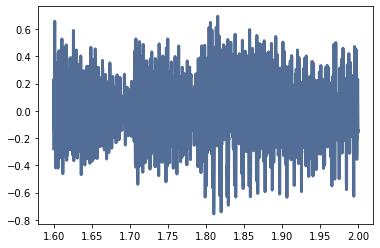

In [56]:
segment.plot()

그리고 아래는 반복되는 주기 중에서 한 주기만을 보여주는 segement의 waveform입니다

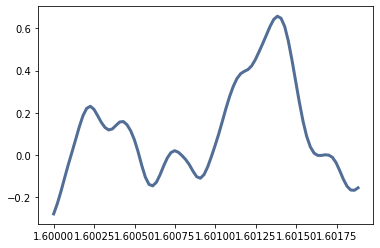

In [62]:
segment.segment(start=1.6, duration=0.0019).plot()

spectrum은 아래와 같습니다

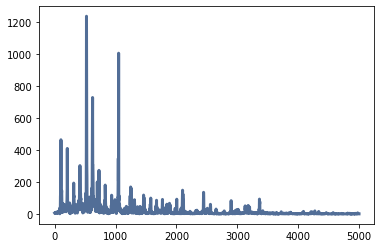

In [67]:
spectrum = segment.make_spectrum()
spectrum.plot(high=5000)

많은 frequency component들이 있는데 이 중,fundamental, dominant frequencies를 보기위해 zoom해보겠습니다

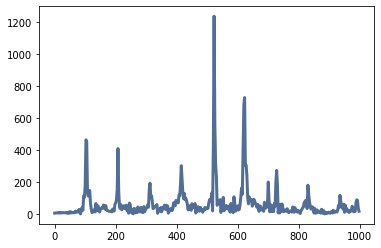

In [72]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)

`peaks` 는 spectrum에서 가장 높은 point들을 frequency와 함께 내림차순으로 print해줍니다

In [70]:
spectrum.peaks()[:30]

[(1238.258430177048, 522.5),
 (1006.7743789596996, 1050.0),
 (729.1731103439342, 622.5),
 (683.4936461684982, 620.0),
 (554.0096571613684, 525.0),
 (464.4392782770089, 102.5),
 (455.30839441440617, 105.0),
 (420.8975903830651, 520.0),
 (410.03478490740156, 207.5),
 (389.45886958766636, 617.5),
 (347.6902673348218, 1045.0),
 (309.8080510498379, 527.5),
 (306.18641078048563, 627.5),
 (305.31514694384003, 625.0),
 (302.58041425176555, 415.0),
 (272.8297727453172, 727.5),
 (255.71006024281678, 1042.5),
 (239.28848886064566, 630.0),
 (234.5814399556799, 530.0),
 (213.40599878895858, 417.5),
 (205.50096017021994, 1047.5),
 (202.44853406602905, 725.0),
 (200.35205789859123, 700.0),
 (193.15823749586585, 312.5),
 (188.85909250751075, 412.5),
 (185.62091205243584, 730.0),
 (180.6819511865016, 830.0),
 (177.20439569945987, 100.0),
 (168.75955614176607, 1247.5),
 (162.8620238144066, 612.5)]

dominant peak 는 522.5 Hz에서 이다. 
fundamental frequency를 찾기란 쉽진 않지만,
207,312,415, 522Hz에서의 peak으로 보아 대략 104Hz가 fundamental frequency라고 추론할 수 있다.
(harmonics at 208, 312, 416, 520 Hz)

104Hz는 G#이다. 우리가 인지하는 pitch는 대게 fundamental frequency이다(dominant가 아닌 fundamental frequency 경우에도)

다음으로는 높은 주파수를 걸러보자

In [76]:
spectrum.low_pass(1000)

그러면 아래와 같이 들린다

In [77]:
spectrum.make_wave().make_audio()

아래의 interaction을 사용하면 segement를 고를 수 있고 다른 fileter를 적용할 수 있다. 


In [80]:
def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    thinkplot.config(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [81]:
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

### Exercise

Synthesize a compound signal by creating SinSignal and CosSignal
objects and adding them up.  Evaluate the signal to get a Wave,
and listen to it.  Compute its Spectrum and plot it.
What happens if you add frequency
components that are not multiples of the fundamental?

### Solution

Here are some arbitrary components I chose.  It makes an interesting waveform!

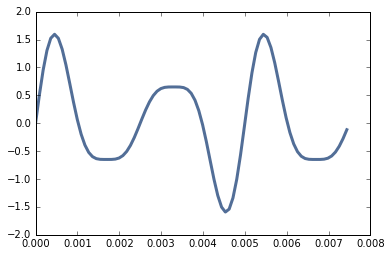

In [15]:
signal = (thinkdsp.SinSignal(freq=400, amp=1.0) +
          thinkdsp.SinSignal(freq=600, amp=0.5) +
          thinkdsp.SinSignal(freq=800, amp=0.25))
signal.plot()

We can use the signal to make a wave:

In [16]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()

And here's what it sounds like:

In [17]:
wave2.make_audio()

The components are all multiples of 200 Hz, so they make a coherent sounding tone.

Here's what the spectrum looks like:

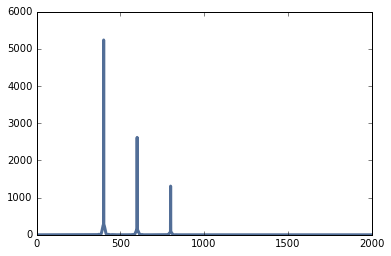

In [18]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=2000)

If we add a component that is not a multiple of 200 Hz, we hear it as a distinct pitch.

In [19]:
signal += thinkdsp.SinSignal(freq=450)
signal.make_wave().make_audio()

### Exercise

Write a function called `stretch` that takes a Wave and a stretch factor and speeds up or slows down the wave by modifying `ts` and `framerate`.  Hint: it should only take two lines of code.

### Solution

I'll use the trumpet example again:

In [20]:
wave3 = thinkdsp.read_wave('170255__dublie__trumpet.wav')
wave3.normalize()
wave3.make_audio()

Here's my implementation of `stretch`

In [21]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

And here's what it sounds like if we speed it up by a factor of 2.

In [22]:
stretch(wave3, 0.5)
wave3.make_audio()

Here's what it looks like (to confirm that the `ts` got updated correctly).

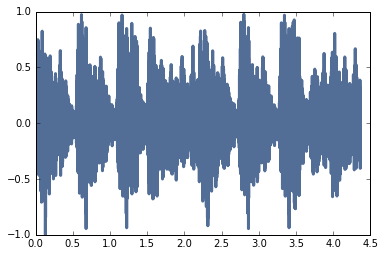

In [23]:
wave3.plot()

I think it sounds better speeded up.  In fact, I wonder if we are playing the original at the right speed.